<a href="https://colab.research.google.com/github/WoradeeKongthong/wine_clustering/blob/master/02_KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Set

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/WoradeeKongthong/wine_clustering/master/wine-clustering.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Note : Based on part 01 (EDA),  
the data set has no missing values,  
but has almost 10% are outliers.

Feature Engineering : Standardization using StandardScaler

In [0]:
X = df.loc[:,:]

# K-Means Clustering

## Preprocessor

In [0]:
preprocessor = StandardScaler()
preprocessor.fit(X)
scaled_X = preprocessor.transform(X)

## Elbow Method
To find optimal number of cluster.  
wcss list is used to keep sum of squared distances of samples to their closest cluster center (inertia_)

In [0]:
wcss = []

for i in range(1, 11) :
  kmeans = KMeans(n_clusters = i, init = 'k-means++')
  kmeans.fit(scaled_X)
  wcss.append(kmeans.inertia_)

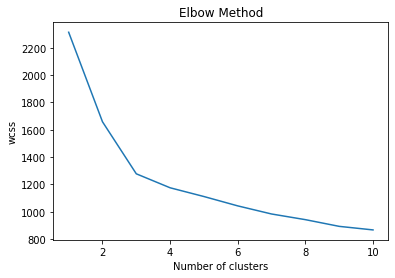

In [7]:
sns.lineplot(x=range(1,11), y=wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Note : optimal number of cluster is 3.

## Clustering

In [0]:
model = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = model.fit_predict(scaled_X)

## Results

Centroids

In [9]:
# scaled centroids
model.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [0]:
# rescaled centroids
centroids = preprocessor.inverse_transform(model.cluster_centers_)

In [0]:
centroids_df = pd.DataFrame(centroids, index=['centroid1','centroid2','centroid3'], columns=X.columns)

In [12]:
centroids_df.T

,centroid1,centroid2,centroid3
Alcohol,13.676774,12.250923,13.134118
Malic_Acid,1.997903,1.897385,3.307255
Ash,2.466290,2.231231,2.417647
Ash_Alcanity,17.462903,20.063077,21.241176
Magnesium,107.967742,92.738462,98.666667
Total_Phenols,2.847581,2.247692,1.683922
Flavanoids,3.003226,2.050000,0.818824
Nonflavanoid_Phenols,0.292097,0.357692,0.451961
Proanthocyanins,1.922097,1.624154,1.145882
Color_Intensity,5.453548,2.973077,7.234706


index of wine records in each cluster

In [13]:
print('Cluster 1 : ',len(X[y_kmeans==0]),' records\n', X[y_kmeans==0].index.values)
print('\nCluster 2 : ',len(X[y_kmeans==1]),' records\n', X[y_kmeans==1].index.values)
print('\nCluster 3 : ',len(X[y_kmeans==2]),' records\n', X[y_kmeans==2].index.values)

Cluster 1 :  62  records
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  73  95 121]

Cluster 2 :  65  records
 [ 59  60  62  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78
  79  80  81  82  84  85  86  87  88  89  90  91  92  93  94  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 119 120 122 123 124 125 126 127 128 129]

Cluster 3 :  51  records
 [ 61  83 118 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


# Visualization
needs Principal Component Analysis

## PCA 2D

In [14]:
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [15]:
centroids_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
centroid1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
centroid2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
centroid3,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


pca on X

In [16]:
pca = PCA(n_components = 2)
pca.fit(X)
pca_X = pca.transform(X)
explained_variance = pca.explained_variance_ratio_
print('PCA n_components = 2 explained_variance : ', explained_variance)

PCA n_components = 2 explained_variance :  [0.99809123 0.00173592]


In [17]:
pca_X

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

pca on centroids

In [0]:
pca_centroids = pca.transform(centroids_df)

In [19]:
pca_centroids

array([[ 353.43144365,    1.89365033],
       [-236.81556233,   -2.81057868],
       [-127.83799912,    1.28002536]])

Plot

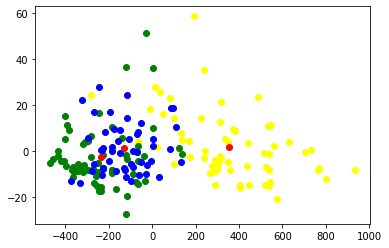

In [20]:
plt.scatter(pca_X[y_kmeans==0,0], pca_X[y_kmeans==0,1],c='yellow')
plt.scatter(pca_X[y_kmeans==1,0], pca_X[y_kmeans==1,1],c='green')
plt.scatter(pca_X[y_kmeans==2,0], pca_X[y_kmeans==2,1],c='blue')
plt.scatter(pca_centroids[:,0], pca_centroids[:,1], c='red')
plt.show()

## PCA 3D

pca on X

In [0]:
pca = PCA(n_components = 3)
pca_X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

In [22]:
explained_variance

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05])

In [23]:
explained_variance.sum()

0.9999221050741547

pca on centroids

In [0]:
pca_centroids = pca.transform(centroids)

In [25]:
pca_centroids

array([[ 353.43144365,    1.89365033,    0.61786347],
       [-236.81556233,   -2.81057868,    1.02799877],
       [-127.83799912,    1.28002536,   -2.06132265]])

Create DataFrame for plotly

In [0]:
pcaX_3d_df = pd.DataFrame(pca_X, columns=['PCA1','PCA2','PCA3'])

In [0]:
pcaX_3d_df['cluster'] = y_kmeans

In [28]:
fig = px.scatter_3d(pcaX_3d_df, x='PCA1',y='PCA2',z='PCA3',color='cluster',hover_name=pcaX_3d_df.index.values)

fig.show()

![alt text](https://github.com/WoradeeKongthong/wine_clustering/blob/master/newplot.png)